In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import wandb

from tqdm import tqdm

### Fetch data from W&B

In [2]:
api = wandb.Api()

runs = api.runs('francois-rozet/priors-manifold')

data = []

for run in tqdm(runs):
    if 'finished' not in run.state:
        continue

    df = run.history()
    df = df[['sigma', 'divergence']]
    df = df[1:]
    df['name'] = run.name

    for key, value in run.config.items():
        df[key] = value

    data.append(df)

df = pd.concat(data)

100%|██████████| 319/319 [02:29<00:00,  2.14it/s]


In [3]:
data = df[(df.m == 1) & (df.n == 3) & (df.components == 256)]
data

,sigma,divergence,name,m,n,p,seed,alpha,noise,method,samples,thickness,components
1,0.01,0.000001,playful-armadillo-969,1,3,1.0,63,3,0.01,hessian,1048576.0,0.01,256
2,0.02,0.000001,playful-armadillo-969,1,3,1.0,63,3,0.01,hessian,1048576.0,0.01,256
3,0.05,0.007084,playful-armadillo-969,1,3,1.0,63,3,0.01,hessian,1048576.0,0.01,256
4,0.10,0.058440,playful-armadillo-969,1,3,1.0,63,3,0.01,hessian,1048576.0,0.01,256
5,0.20,0.180728,playful-armadillo-969,1,3,1.0,63,3,0.01,hessian,1048576.0,0.01,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.50,0.237771,lyric-dream-708,1,3,1.0,0,3,0.01,zero,1048576.0,0.01,256
7,1.00,2.344846,lyric-dream-708,1,3,1.0,0,3,0.01,zero,1048576.0,0.01,256
8,2.00,40.463051,lyric-dream-708,1,3,1.0,0,3,0.01,zero,1048576.0,0.01,256
9,5.00,673.022711,lyric-dream-708,1,3,1.0,0,3,0.01,zero,1048576.0,0.01,256


### Plots

In [4]:
rc = {
    'axes.axisbelow': True,
    'axes.linewidth': 1.0,
    'figure.dpi': 150,
    'figure.figsize': (3.2, 3.2),
    'font.size': 12.0,
    'legend.fontsize': 'xx-small',
    'lines.linewidth': 1.0,
    'savefig.transparent': True,
    'xtick.labelsize': 'x-small',
    'xtick.major.width': 1.0,
    'ytick.labelsize': 'x-small',
    'ytick.major.width': 1.0,
    'font.family': ['serif'],
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
}

plt.rcParams.update(rc)
sb.set_palette(sb.color_palette('deep'))

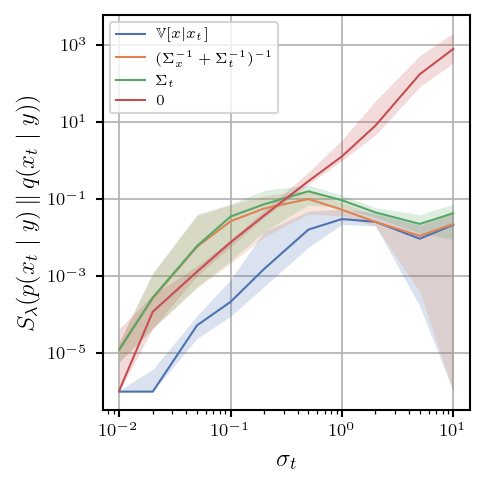

In [5]:
ax = sb.lineplot(
    data,
    x='sigma',
    y='divergence',
    hue='heuristic',
    estimator='median',
    errorbar=('pi', 50),
    err_kws={'linewidth': 0},
)

ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\sigma_t$')
ax.set_ylabel('$S_\lambda(p(x_t \mid y) \, \| \, q(x_t \mid y))$')

handles, _ = ax.get_legend_handles_labels()
labels = ['$\mathbb{V}[x | x_t]$', '$(\Sigma_x^{-1} + \Sigma_t^{-1})^{-1}$', '$\Sigma_t$', '$0$']

ax.legend(handles=handles, labels=labels)

fig = plt.gcf()
fig.tight_layout(pad=0.5)
fig.savefig('divergence.pdf', dpi=300)